<a href="https://colab.research.google.com/github/KingNam/Hongong_ml_dl/blob/main/4_2_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

점진적학습?
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 학습시키는 방법

점진적 학습 알고리즘 중 가장 대표적인 알고리즘을 **확률적 경사 하강법** 이라 한다.

### 확률적 경사 하강법 (Stochastic Gradient Descent)

 - Stochastic: 무작위 확률 분산을 가지거나 통계적으로 분석 가능한 패턴이나 정확히 예측할 수 없는(
 randomly determined; having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely.)

 - Gradient: 경사(an inclined part of a road or railway; a slope)

 - Descent: 하강

> 즉, 확률적 경사 하강법이란 무작위하게 경사를 따라 내려가는 방법


확률적 경사 하강법을 배우기 전에

1. 경사에 대해서 알아보고

2. 경사 하강법에 대해 알아보자

[관련링크(공돌이의 수학정리노트)](https://angeloyeo.github.io/2019/08/25/gradient.html)

### 1.1 편미분 (partial derivative)

다변수 함수의 특정 변수를 제외한 나머지 변수를 상수로 간주하여 미분하는 것(위키피디아)

그렇다면, 편미분은 어떤 상황에서 필요한가?

독립변수가 2개이고 종속변수가 하나인 단순한형태까지만 확장한 다변량 함수를 보자

ex. $f(x, y) = x^{2} + xy + y^{2}$

![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-25_gradient/noname01.png)

이 함수에서 하나의 점에 대한 기울기를 구하는 것이 가능한가? 
-  유일한 직선으로 결정되지 않는다.
- 즉, $x$ 방향 만으로의 기울기와 $y$ 방향 만으로의 기울기는 각각 구할 수 있기 때문에 편미분을 통해 $x$ or $y$ 방향만으로의 기울기를 구한다.  



### 1.2 Gradient(기울기)

$x$ 방향으로 편미분 값과 $y$ 방향으로의 편미분 값을 원소로 하는 벡터를 출력한다

이것을 수식으로 표현하면 다음과 같다.

$gradient(f) = f_{x}\hat{i} + f_{y}\hat{j} = 
\frac{\partial}{\partial{x}}f(x,y)\hat{i} + \frac{\partial}{\partial{y}}f(x,y)\hat{j} $  




또는, 

$\nabla{f} = f_{x}\hat{i} + f_{y}\hat{j} = 
\frac{\partial}{\partial{x}}f(x,y)\hat{i} + \frac{\partial}{\partial{y}}f(x,y)\hat{j} $  

그럼 위의 식 $f(x, y) = x^{2} + xy + y^{2}$
을 $x$와 $y$에 대해 편미분 하자

$\frac{\partial}{\partial{x}}f(x,y) = \frac{\partial}{\partial{x}}(x^{2} + xy + y^{2}) = 2x+y $

$\frac{\partial}{\partial{y}}f(x,y) = \frac{\partial}{\partial{x}}(x^{2} + xy + y^{2}) = 2y+x $

그러면, scalar로 표현되어 있는 함수에서 벡터 값을 얻어낼 수 있다.

이 그래디언트(두개의 벡터)를 통해 함수의 해당 점이 어느 방향으로 값이 커지고 있는지 나타낼 수 있다.

### 2. 경사하강법 (gradient descent)

1) 함수 값이 **낮아지는 방향**으로 독립 변수 값을 변형시키면서 최종적으로는 최소 함수 값을 갖도록 하는 독립 변수 값을 찾는 방법이다.

2) 함수의 기울기(gradient)를 이용해 $x$의 값을 어디로 옮겼을 때 함수가 최소값을 찾는지 알아보는 방법

- 기울기가 양수라는 것은 $x$값이 커질 수록 함수 값이 커진다는 것을 의미
- 기울기가 음수라는 것은 $x$ 값이 커질 수록 함수의 값이 작아진다는 것을 의미
- 또, 기울기의 값이 크다는 것은 가파르다는 것을 의미하기도 하지만, 한편으로는 $x$의 위치가 최소값/최대값에 해당하는 좌표로부터 멀리 떨어져있다는것을 의미

이를 이용하면 임의의 점 $x$가 커질 수록 함수값이 커지는 중이라면 음의방향으로 $x$를 옮겨야 할 것이고, 반대로 특정포인트 $x$ 에서 $x$가 커질 수록 함수값이 작아지는 중이라면 양의 방향으로 $x$를 옮기면 된다.

그러면 수식은 다음과 같다.

$x_{i+1} = x_{i} - (이동거리) \times(기울기의 부호)$

여기서 이동거리는 사용자가 적절히 조절할수있게 수식을 조정한다.

따라서, 최종수식은 다음과 같다.

$x_{i+1} = x_{i} - \alpha\frac{\partial{f}}{\partial{x}}x_{i} $

이름 다변수함수에 대해 확정하면 다음과 같이 쓸 수 있다.

$x_{i+1} = x_{i} - \alpha\nabla f(x_{i}) $


### 3. 확률적 경사 하강법 (Stochastic Gradient Descent)
훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.

만약 모든 샘플을 다썼는데도 원하는 위치에 도달하지 못했다면?

위 과정을 반복적으로 진행한다. 

이렇게 SGD에서 훈련세트를 한 번 모두 사용하는 과정을 **에포크(epoch)** 라고 부른다.

훈련과정과 사용되는 샘플에 따라 다음과 같은 순서를 따른다.

1. 훈련세트에서 샘플을 꺼낸다
 - 1개씩 꺼내면 **확률적 경사 하강법(SGD)**
 - 여러개씩 꺼내면 **미니배치 경사 하강법(Minibatch GD)**
 - 한번에 꺼내면 **배치 경사 하강법(Batch GD)**

 
2. 샘플을 이용하여 경사를 이동함 (반복)

3. 훈련세트를 다 사용했나요?
  - Yes, 1 에포크 완료
  - No, 1을 반복

4. 훈련세트에 샘플을 모두 채우고 다시 시작 

### 4. 손실 함수 (Loss function)

어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준

손실 함수의 값이 작을 수록 좋다.

그러나 어떤 값이 최소값인지 알지 못하고 가능한 많이 찾아보고 결정

따라서, 값을 효율적으로 계산할 수 있는 SGD 사용

1) 로지스틱 손실 함수 (이진 크로스엔트로피 손실함수)

로지스틱 회귀에서 사용하는 손실함수는 두가지 결과를 내는 이진 (binary) 함수를 사용한다.

그 전에, 크로스엔트로피 (Cross-Entropy) 에 대해 이해해보자. 

그러기 위해선 다음에 대한 이해가 필요하다.
 > 정보량 / 엔트로피 / 크로스 엔트로피

- 정보량 (Information)
[출처](http://www.aistudy.com/control/information_theory.htm)

 한줄요약: "호의가 계속되면, 그게 권리인줄 알아요" 
[동영상링크]( https://www.youtube.com/watch?v=n4Hg-dQNP-E)

 Claude Shannon이 확립한 정보이론은 **정보를 운반하고 있는 기호의 확률적 성질에 착안한 것**이다.

 여기서 말하는 정보란, 신문의 뉴스나 특종기사와 같은 정보가 아니라, 문자,음성,유전자 등 넓은 의미의 정보를 말한다.

 샤논은 1948년 "통신의 수학적 이론(A Mathmatical Theory of Communication)" 이라는 논문을 발표함으로써, "정보량(Information Content)"의 정의를 세우고 여러 가지 문제를 해결할 수 있는 이론적 기초를 제공했다.

 샤논은 정보단위로 2진법 or 비트를 택했다.
 이것은 단지 2개의 부호 1(Yes) or 0(No)로 아주 간편하고 효율적인 코드이기 때문이다.
 
 다음 1~16 숫자맞추기 게임을 생각해보자. 
 
 정답은 9라고 가정하면 다음에 질문을 통해 답을 맞출 수 있다.

 "8이하입니까?"  --> "아니오"

 "12이하입니까?   --> "예"

 "10이하입니까?" -->  "예"

 "9이하입니까? --> "예"

 정답은 9네요!

 여기서 답을 알기위해서는 다음 세가지 조건이 필요하다.

 첫째, 숫자의 수. 여기서는 16개 이므로 아무 정보도 없는 상황에서 숫자를 맞출 확률은 $\frac{1}{16}$이다.

 둘째, 대답의 종류는 두가지(예, 아니오) 로 허용된다.

 셋째, 질문횟수. 16개의 수 중 특정 수를 알아맞히는데는 4회의 질문이 필요하다.

 이 세가지 조건은 다음과 같은 수식으로 표현된다.

 $2^4 = 16$ 

 이 식을 일반화시키면 다음과 같다.

 $ W = 2^n $
 
 여기서, $W$는 최대숫자 이고 $n$은 질문횟수다. 위 식의 양변에 로그를 취하면

 $ log{W} = nlog{2}$  ==>  $n = log_{2}^{W}$  이다.

 여기서 $W$대신 어떤 사상의 확률 $p$라고 하면

 $n = -log_{2}^{P}$ 로 정의된다.

 더 자세한 공부는 출처를 통해 공부하자.

- Entropy
 
 엔트로피는 정보량의 기댓값을 말한다. 따라서, 기댓값의 정의에 따라 아래와 같다.

 $Entropy = E[-log^{p(x)}] = \sum_{x} -p(x)log^{p(x)}$



- Cross Entropy

 다른 확률을 곱해서 Entropy를 계산한 것.

 예를 들어, 0 또는 1만 가지는 확률변수 $X$에 대해서

 $entropy = -p(X=0)log(p(X=0)-p(X=1)log(p(X=1)$

 $cross-entropy = -p(X=0)log(p(X=0)-p(X=1)log(p(X=1)$

 이고, binary에서 확장해 본다면

 $CE(p,q) = - \sum p(x) \log q(x)$ 이다. 

 분류문제에서는 위 식을 손실함수로 사용하고 값이 작을수록 좋다

### 5. SGDClassifier

In [2]:
import pandas as pd 
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
#확률적경사하강법을 제공하는 대표적인 분류용클래스는 SGDClassifer
from sklearn.linear_model import SGDClassifier

In [8]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state =42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [12]:
# 모델을 이어서 훈련할때는 partial_fit() 메서드를 사용함
# 1에포크씩 이어서 훈련된다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8739495798319328
0.85


그렇다면, 얼마나 더 훈련해야할까?

### 6. 에포크와 과대/과소적합

SGD를 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합문제가 나올 수 있다.

에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 분포를 전부 보지 못하고 훈련을 마치는 셈. 에포크 횟수가 많으면 훈련세트를 완전히 학습한다. 훈련 세트에 아주 잘 맞는 모델이 만들어진다.

즉, 적은 에포크횟수로 훈련한 모델은 과소적합 된 모델을 가능성이 있고 많은 에포크횟수로 훈련한 모델은 과대적합된 모델일 가능성이 있다.



In [16]:
# 에포크에 따른 정확도 그래프를 통해 적절한 에포크 수 찾기

import numpy as np
sc = SGDClassifier(loss='log', random_state= 42)
train_score =[]
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

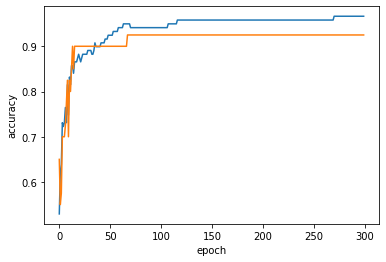

In [18]:
# 300번의 에포크 똥안 기록한 훈련 세트와 테스트 세트의 점수를 그래포로 그려 보자.
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [22]:
# SGDClassifer 는 일정 에포크동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
# tol 매개변수에서 향상될 최솟값을 지정함.
# 아래의 코드에서는 향상될 최솟값을 None으로 두고 진행.

sc100 = SGDClassifier(loss='log',max_iter=100,tol=None, random_state=42)
sc100.fit(train_scaled, train_target)
print(sc100.score(train_scaled, train_target))
print(sc100.score(test_scaled, test_target))

0.957983193277311
0.925
